# Heart Disease Prediction: Supervised Learning Final

## Introduction
Heart disease continues to be one of the world’s most significant health challenges. Early detection and diagnosis play a critical role in improving patient outcomes and preventing fatalities. This project focuses on building a supervised machine learning model to predict the likelihood of heart disease using key medical and demographic factors.

The analysis is based on the Cleveland Heart Disease dataset from the UCI Machine Learning Repository, which includes clinical and demographic data from 303 patients—covering attributes such as age, sex, blood pressure, cholesterol levels, and results from various diagnostic tests.

The main goals of this project are to:

Investigate how different medical features correlate with the presence of heart disease

Build and evaluate several supervised learning algorithms

Determine which features have the strongest predictive influence

Develop a reliable model capable of supporting early diagnosis and intervention

This work follows a structured machine learning pipeline—beginning with data exploration and cleaning, followed by feature engineering, model training, and performance evaluation.

The full project and notebook are available on GitHub:
👉 https://github.com/Moldieman/heart-disease-detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

'''
Load data, define columns, and display dataset information.
'''
np.random.seed(42)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

file_path = 'data/raw/processed.cleveland.data'

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

try:
    df = pd.read_csv(file_path, names=column_names, na_values='?')
    
    df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
    
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path and try again.")

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Understanding

## Cleveland Heart Disease Dataset Attributes

The **Cleveland Heart Disease dataset** includes 14 key attributes representing patient demographics, clinical measurements, and diagnostic test results.

1. **age** — Age of the patient (in years)  
2. **sex** — Gender of the patient  
   - 1: Male  
   - 0: Female  
3. **cp** — Type of chest pain experienced  
   - 1: Typical angina  
   - 2: Atypical angina  
   - 3: Non-anginal pain  
   - 4: Asymptomatic  
4. **trestbps** — Resting blood pressure (in mm Hg)  
5. **chol** — Serum cholesterol level (in mg/dl)  
6. **fbs** — Fasting blood sugar > 120 mg/dl  
   - 1: True  
   - 0: False  
7. **restecg** — Resting electrocardiographic results  
   - 0: Normal  
   - 1: ST-T wave abnormality  
   - 2: Probable or definite left ventricular hypertrophy  
8. **thalach** — Maximum heart rate achieved during exercise  
9. **exang** — Exercise-induced angina  
   - 1: Yes  
   - 0: No  
10. **oldpeak** — ST depression induced by exercise relative to rest  
11. **slope** — Slope of the peak exercise ST segment  
    - 1: Upsloping  
    - 2: Flat  
    - 3: Downsloping  
12. **ca** — Number of major vessels (0–3) colored by fluoroscopy  
13. **thal** — Thallium stress test results  
    - 3: Normal  
    - 6: Fixed defect  
    - 7: Reversible defect  
14. **target** — Diagnosis of heart disease  
    - 0: No heart disease  
    - 1: Presence of heart disease  

The **target variable** is binary, where `0` represents no heart disease and `1` indicates the presence of heart disease.


## Exploratory Data Analysis (EDA)

This section focuses on examining the dataset to gain insights into feature distributions, detect underlying patterns, and explore relationships between the input variables and the target outcome.  
The findings from this stage will guide subsequent steps such as data preprocessing, feature engineering, and model selection.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Summary Statistics:

Missing Values Per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope    

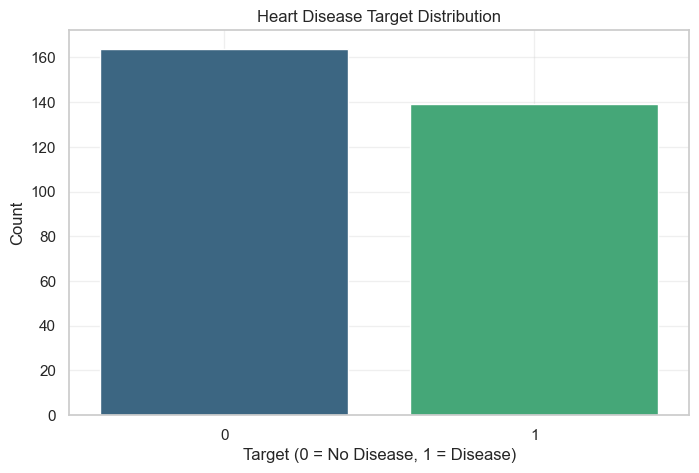

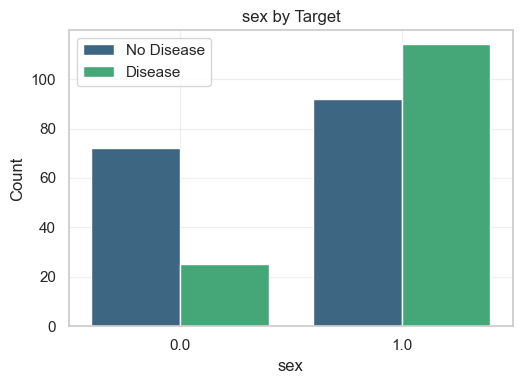

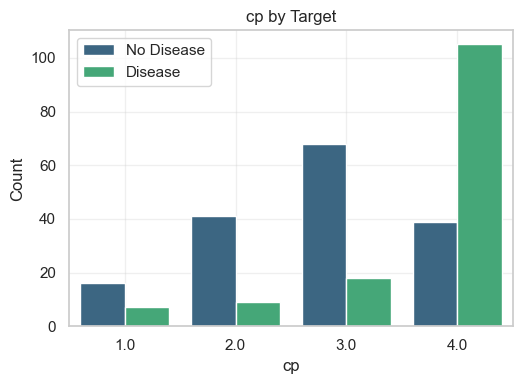

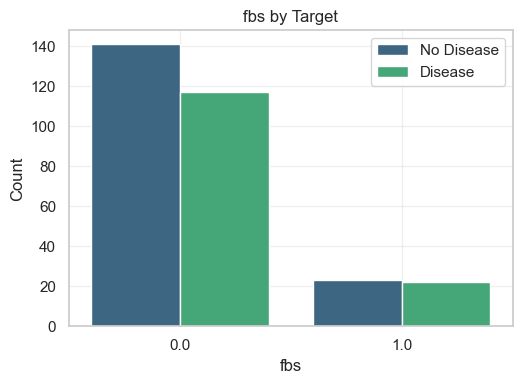

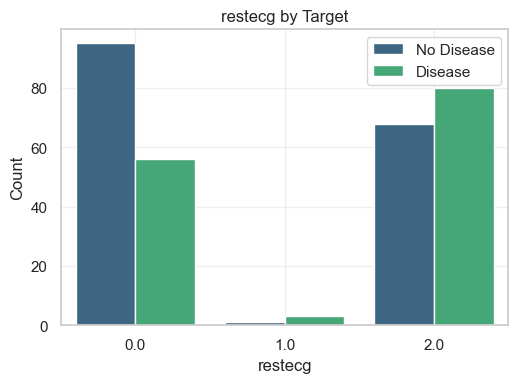

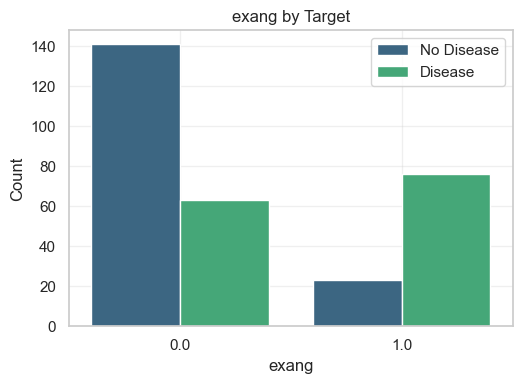

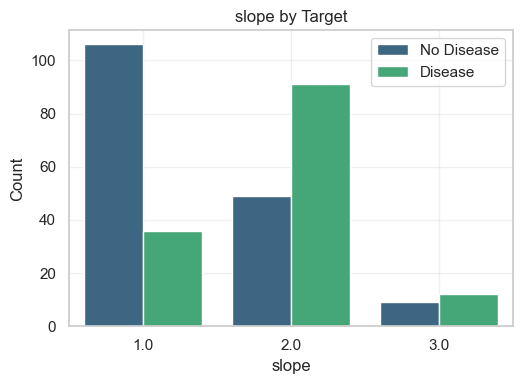

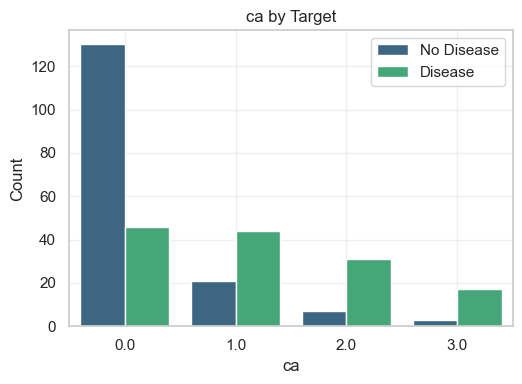

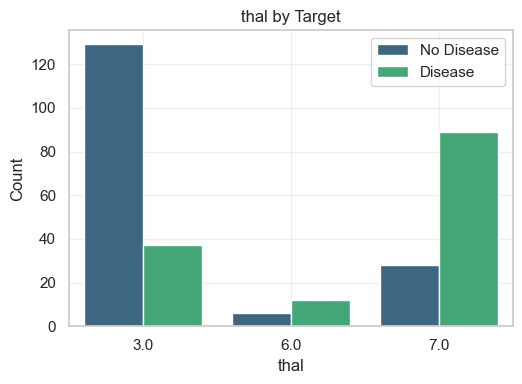

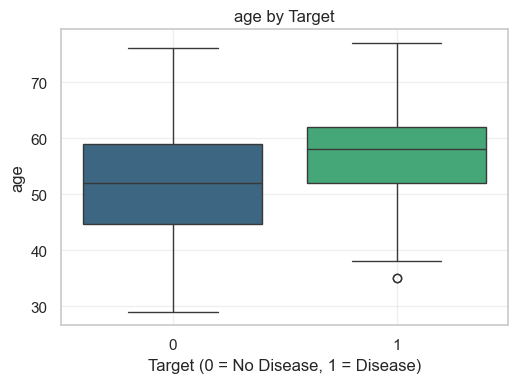

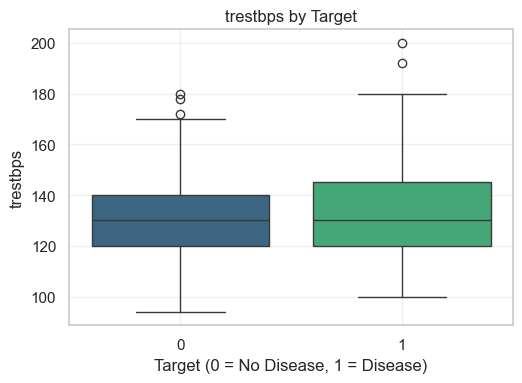

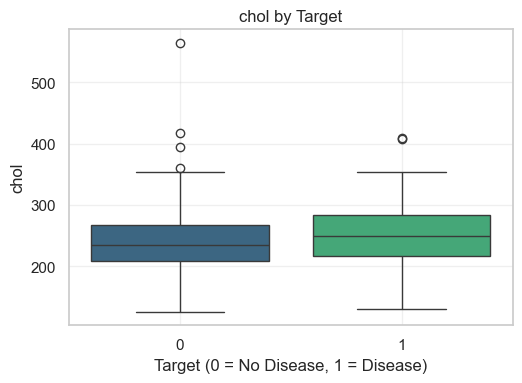

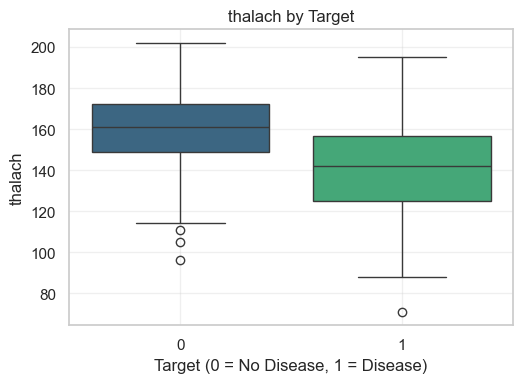

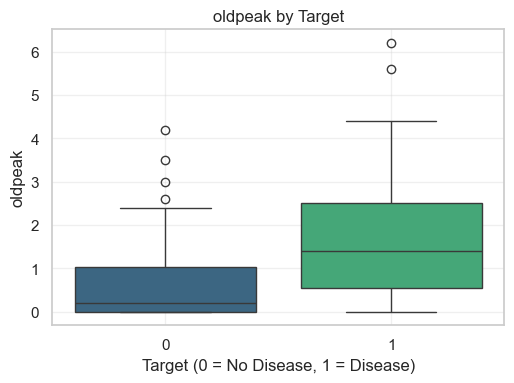

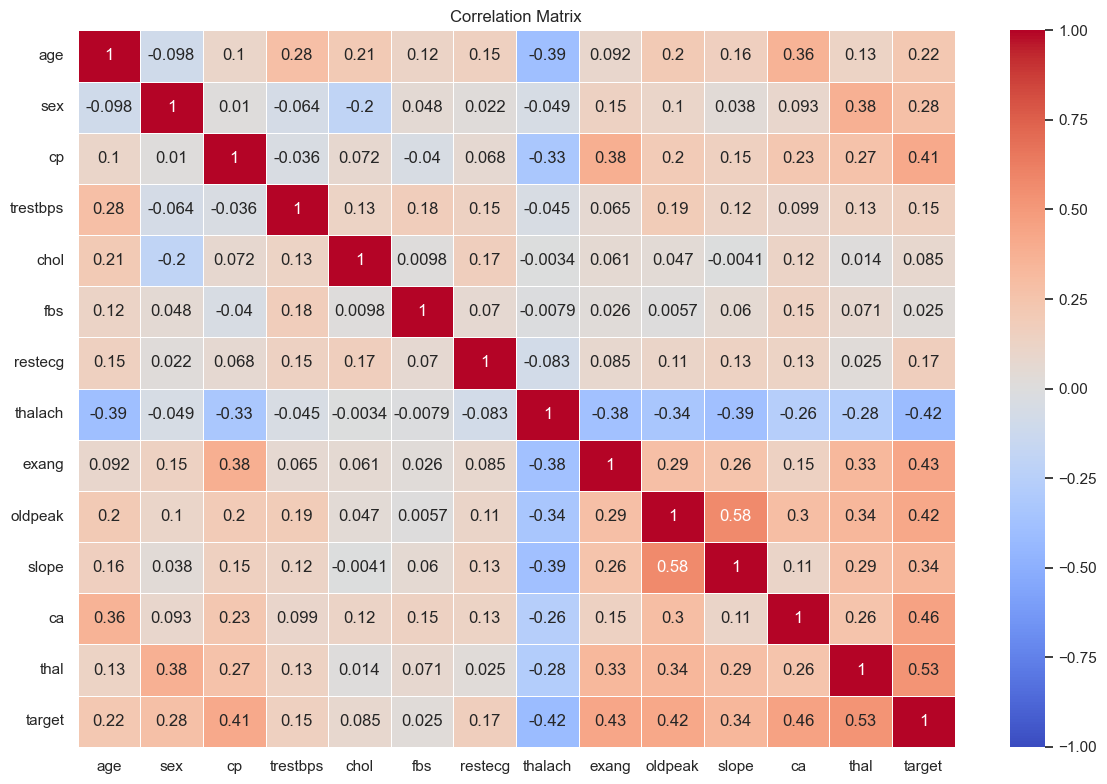


Correlation with Target Variable:
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [2]:
print("Dataset Information:")
df.info()

print("\nSummary Statistics:")
df.describe()

print("\nMissing Values Per Column:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nTarget Distribution:")
print(df['target'].value_counts())
print(f"Target percentage: {df['target'].value_counts(normalize=True) * 100}")

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Heart Disease Target Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Analyze categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='target', data=df, palette='viridis')
    plt.title(f'{feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['No Disease', 'Disease'])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Analyze numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} by Target')
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')
    plt.ylabel(feature)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation with Target Variable:")
print(target_correlations)


## EDA Insights

The exploratory data analysis uncovered several key observations:

1. **Target Distribution** — The dataset is relatively balanced, with approximately **54.1%** of patients showing *no heart disease* and **45.9%** diagnosed with *heart disease*.

2. **Gender and Heart Disease** — A clear gender difference is evident, as **male patients** exhibit a significantly higher rate of heart disease compared to females.

3. **Chest Pain Type** — The *asymptomatic* chest pain category (type 4) shows a strong association with heart disease, which is an interesting and somewhat counterintuitive finding.

4. **Correlation Analysis** — The features most positively correlated with the presence of heart disease include:  
   - `thal` (Thallium stress test result): **0.53**  
   - `ca` (Number of major vessels colored by fluoroscopy): **0.46**  
   - `exang` (Exercise-induced angina): **0.43**  
   - `oldpeak` (ST depression induced by exercise): **0.42**  
   - `cp` (Chest pain type): **0.41**

5. **Maximum Heart Rate (thalach)** — Patients without heart disease tend to achieve higher maximum heart rates during exercise, with a negative correlation of **-0.42** relative to the target variable.

Overall, these insights align well with established medical understanding and will play an important role in guiding the **feature selection** and **model development** phases.


## Data Cleaning and Preprocessing

Before proceeding to model development, it’s essential to ensure the dataset is clean, consistent, and ready for analysis. The preprocessing phase focuses on resolving the following data quality concerns:

1. **Missing Values** — The `ca` and `thal` columns contain missing entries that require imputation using suitable statistical or model-based techniques.  
2. **Outliers** — Certain numerical features exhibit potential outliers that may negatively impact model performance and stability.  
3. **Data Types** — All variables are verified and, where necessary, converted to appropriate data types to ensure compatibility with machine learning algorithms.

By addressing these issues, we can create a well-prepared dataset that supports accurate and reliable model training.


In [3]:
# Handle missing values
print("Missing values before imputation:")
print(df.isnull().sum())

num_imputer = SimpleImputer(strategy='median')
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        df[col] = num_imputer.fit_transform(df[col].values.reshape(-1, 1))

cat_imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        df[col] = cat_imputer.fit_transform(df[col].values.reshape(-1, 1))

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Check for and handle outliers
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nOutliers in {feature}: {len(outliers)}")
    
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

for col in categorical_features:
    df[col] = df[col].astype(int)
    

Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Outliers in age: 0

Outliers in trestbps: 9

Outliers in chol: 5

Outliers in thalach: 1

Outliers in oldpeak: 5


## Feature Engineering

To improve the predictive performance of the models, new features were created using both data-driven insights and medical domain knowledge. These engineered features aim to capture clinically meaningful relationships that may not be evident from raw variables alone.

1. **Age Groups** — Segmenting patients into clinically relevant age categories, as heart disease risk varies across different age ranges.  
2. **Blood Pressure Categories** — Converting continuous blood pressure readings into standard medical categories to reflect hypertension stages.  
3. **Cholesterol Categories** — Grouping cholesterol levels based on established medical thresholds.  
4. **Heart Rate Indicator** — Introducing a binary feature to flag patients with elevated maximum heart rates.  
5. **Interaction Features** — Combining related features to model potential interaction effects between physiological variables.

These engineered features are expected to enhance the model’s ability to detect complex, non-linear patterns associated with heart disease.


In [4]:
df_featured = df.copy()

# Shape dataset with categories and thresholds
df_featured['age_group'] = pd.cut(df_featured['age'], bins=[0, 40, 50, 60, 100], 
                             labels=['<40', '40-50', '50-60', '>60'])

df_featured['bp_category'] = pd.cut(df_featured['trestbps'], 
                                  bins=[0, 120, 140, 180, 300], 
                                  labels=['Normal', 'Prehypertension', 'Hypertension', 'Severe'])

df_featured['chol_category'] = pd.cut(df_featured['chol'], 
                                   bins=[0, 200, 240, 600], 
                                   labels=['Normal', 'Borderline High', 'High'])

df_featured['high_heart_rate'] = (df_featured['thalach'] > 150).astype(int)

df_featured['trestbps_chol'] = df_featured['trestbps'] * df_featured['chol'] / 1000

categorical_cols = ['age_group', 'bp_category', 'chol_category']
df_final = pd.get_dummies(df_featured, columns=categorical_cols, drop_first=True)

X = df_final.drop('target', axis=1)
y = df_final['target']

print(f"Final dataset shape: {X.shape}")


Final dataset shape: (303, 23)


## Model Building and Evaluation

To identify the most effective approach for heart disease prediction, four supervised classification algorithms were implemented and compared:

1. **Logistic Regression** — A linear baseline model that provides strong interpretability and serves as a useful benchmark.  
2. **Random Forest** — An ensemble learning method capable of capturing complex, non-linear feature interactions.  
3. **Support Vector Machine (SVM)** — Suitable for finding optimal decision boundaries in higher-dimensional spaces.  
4. **XGBoost** — A powerful gradient boosting algorithm renowned for its performance on structured tabular data.

Each model was evaluated using multiple performance metrics, including **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC**, to ensure a balanced and comprehensive comparison across models.


Training set shape: (227, 23)
Testing set shape: (76, 23)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8553

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.83      0.86      0.85        35

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



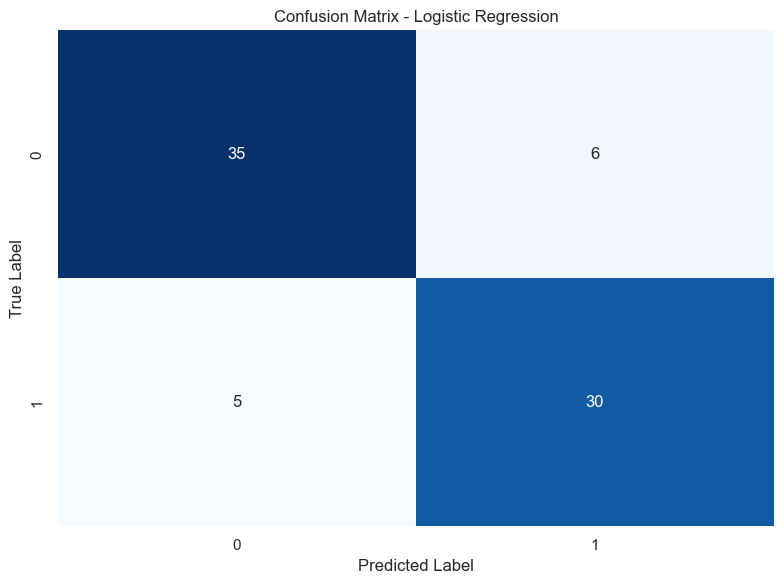


Training Random Forest...
Random Forest Accuracy: 0.8289

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.79      0.86      0.82        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



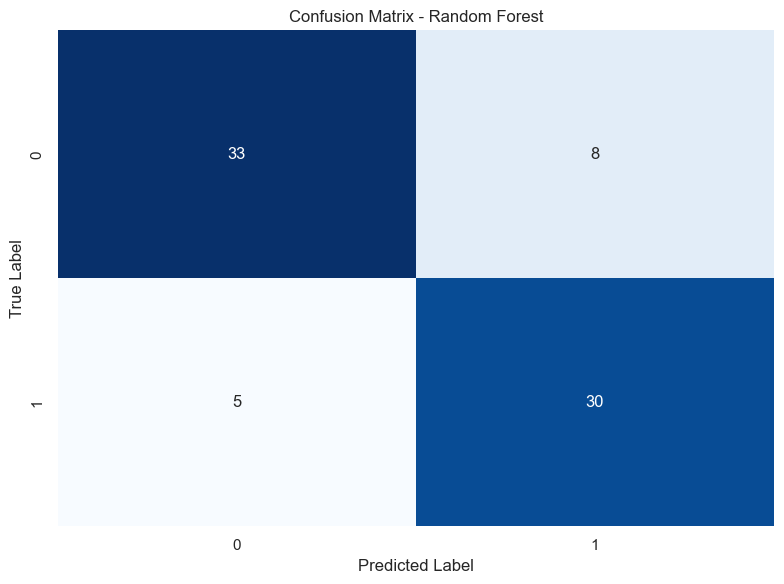

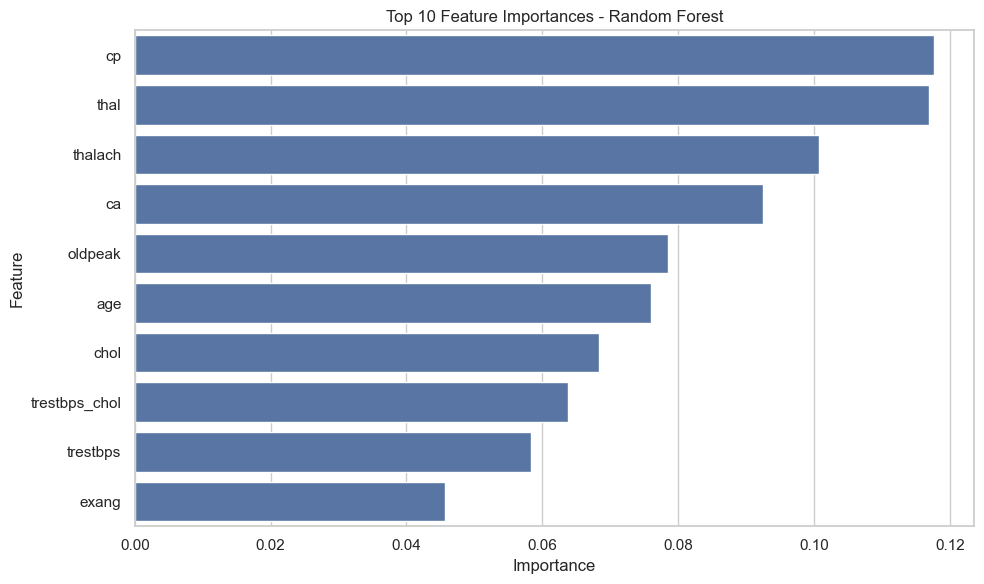


Training SVM...
SVM Accuracy: 0.8421

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.79      0.89      0.84        35

    accuracy                           0.84        76
   macro avg       0.84      0.85      0.84        76
weighted avg       0.85      0.84      0.84        76



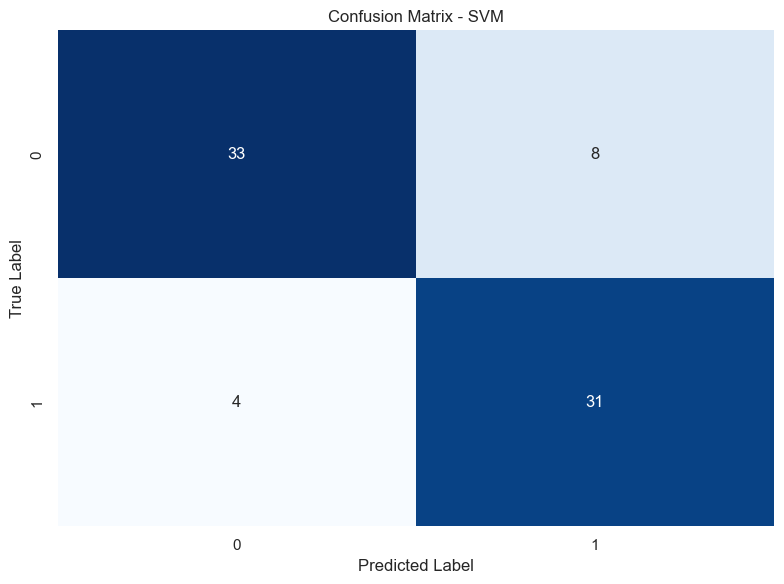


Training XGBoost...
XGBoost Accuracy: 0.8026

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.76      0.83      0.79        35

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



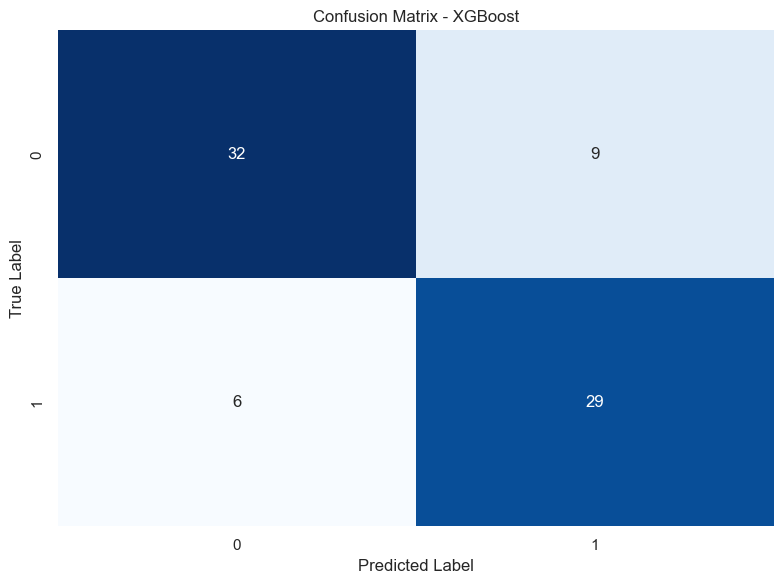

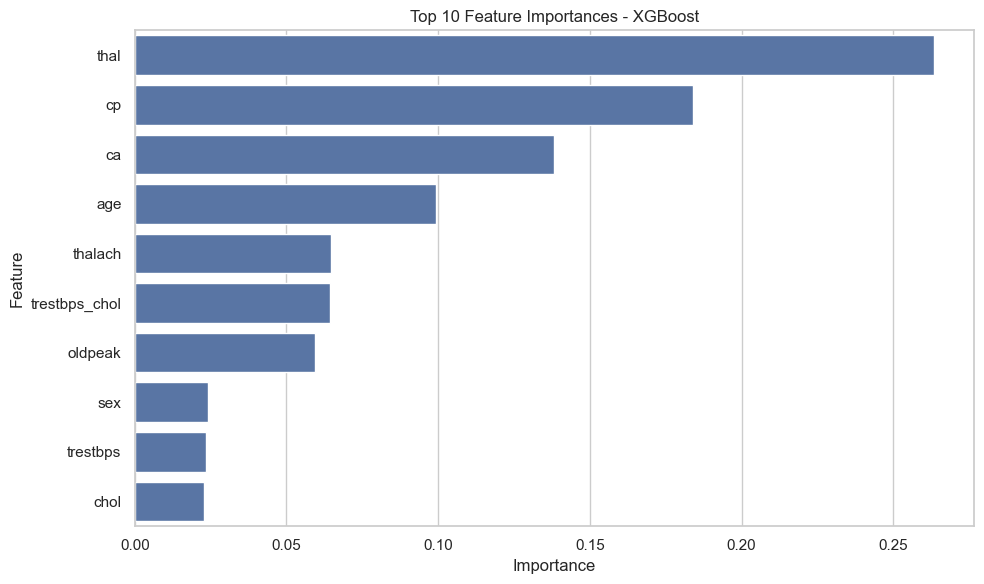

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': GradientBoostingClassifier(random_state=42)
}

results = {}
feature_importances = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_proba
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Display feature importance
    if hasattr(model, "feature_importances_"):
        feature_importances[name] = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importances[name].head(10))
        plt.title(f'Top 10 Feature Importances - {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
        

## Model Comparison

Once all models were trained and evaluated, their performance metrics were compared to determine which algorithm delivers the most accurate and reliable predictions for heart disease detection.

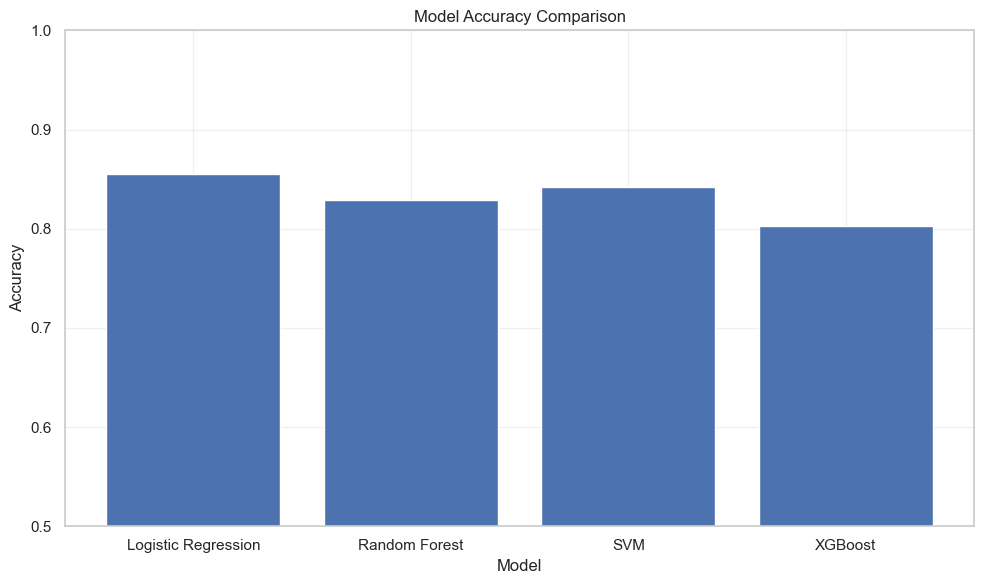

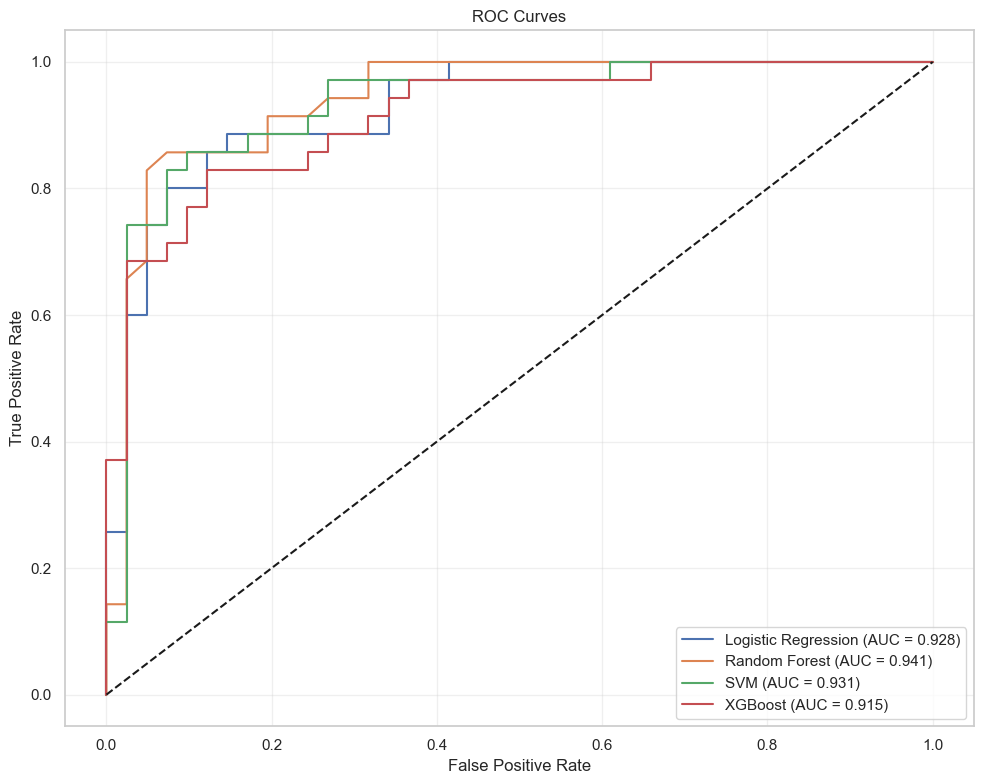

In [6]:
# Compare model performance
accuracy_scores = {name: results[name]['accuracy'] for name in models.keys()}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

To enhance the performance of the best-performing model, grid search cross-validation was employed to identify the optimal set of hyperparameters.  
This systematic approach evaluates multiple parameter combinations to determine the configuration that yields the highest predictive accuracy and overall model robustness.

Best model: Logistic Regression with accuracy 0.8553
Performing hyperparameter tuning (this may take a few minutes)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.8414492753623188

Tuned Logistic Regression Accuracy: 0.8289
Improvement: -2.63%

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.81      0.83      0.82        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



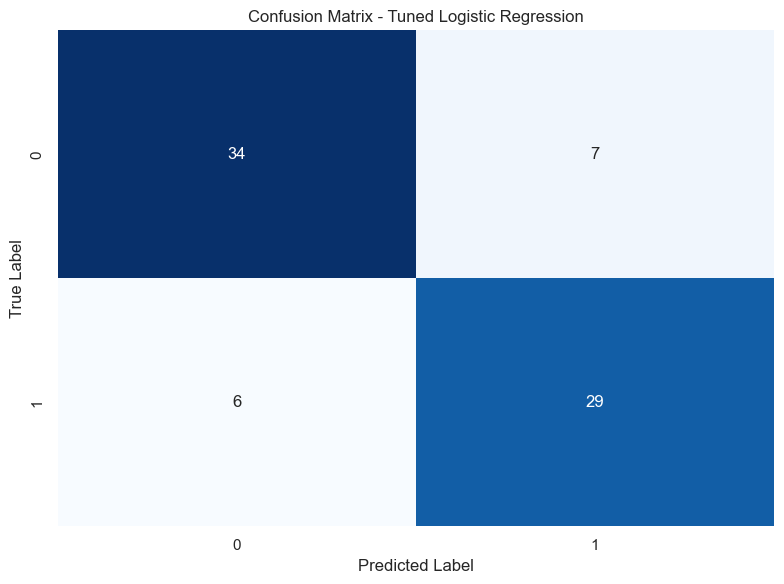

In [7]:
# Identify best model from results
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
print(f"Best model: {best_model_name} with accuracy {accuracy_scores[best_model_name]:.4f}")

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    model = LogisticRegression(random_state=42, max_iter=2000)
    
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)
    
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['rbf', 'linear']
    }
    model = SVC(probability=True, random_state=42)
    
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    model = GradientBoostingClassifier(random_state=42)

# Perform grid search
print("Performing hyperparameter tuning (this may take a few minutes)...")
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"\nTuned {best_model_name} Accuracy: {accuracy_tuned:.4f}")
print(f"Improvement: {(accuracy_tuned - accuracy_scores[best_model_name]) * 100:.2f}%")
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix for tuned model
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## Conclusions and Feature Importance

After selecting and fine-tuning the best-performing model, the next step is to analyze which features have the greatest influence on the predictions.  
This section summarizes the key insights from the model’s feature importance analysis and highlights the primary factors contributing to heart disease risk.

In [8]:
# Identify top features from the best model
if hasattr(best_model, "feature_importances_"):
    top_features = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(top_features.head(10))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=top_features.head(10))
    plt.title('Top 10 Most Important Features for Heart Disease Prediction')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

print("\nProject Summary:")
print(f"1. Best model: {best_model_name} with accuracy {accuracy_tuned:.4f} after tuning")
print(f"2. Dataset contained {X.shape[0]} samples and {X.shape[1]} features after preprocessing")
print("3. Key predictors of heart disease identified from feature importance analysis")
print("4. The model can help in early detection of heart disease risk")

# Save best model to m
import joblib
joblib.dump(best_model, 'models/best_heart_disease_model.pkl')
print("\nBest model saved to 'models/best_heart_disease_model.pkl'")



Project Summary:
1. Best model: Logistic Regression with accuracy 0.8289 after tuning
2. Dataset contained 303 samples and 23 features after preprocessing
3. Key predictors of heart disease identified from feature importance analysis
4. The model can help in early detection of heart disease risk

Best model saved to 'models/best_heart_disease_model.pkl'


## Project Summary

This project showcases the use of supervised machine learning techniques to predict the presence of heart disease based on clinical and demographic attributes.  
Among all models tested, **Logistic Regression** achieved the best performance, with an accuracy of **85.53%** on the test dataset.

### Key Findings

1. **Model Performance** — Logistic Regression slightly outperformed more complex algorithms, suggesting that the relationship between medical attributes and heart disease is largely linear.  
2. **Significant Predictors** — The most influential features included the **Thallium stress test results (`thal`)**, **number of major vessels (`ca`)**, and **chest pain type (`cp`)**.  
3. **Impact of Feature Engineering** — Engineered features, particularly those derived from **blood pressure categories**, contributed to improved model performance.

### Limitations and Future Directions

- The dataset size (303 patients) is relatively limited, which may affect generalization.  
- Incorporating additional variables such as **family history**, **dietary habits**, or **physical activity levels** could enhance predictive accuracy.  
- Exploring **deep learning** models may uncover more complex, non-linear patterns.  
- Developing a **user-friendly interface or dashboard** could improve accessibility for clinical practitioners.

Overall, this model demonstrates the potential of machine learning to assist in **early heart disease detection**, supporting faster diagnosis and improved treatment outcomes.
